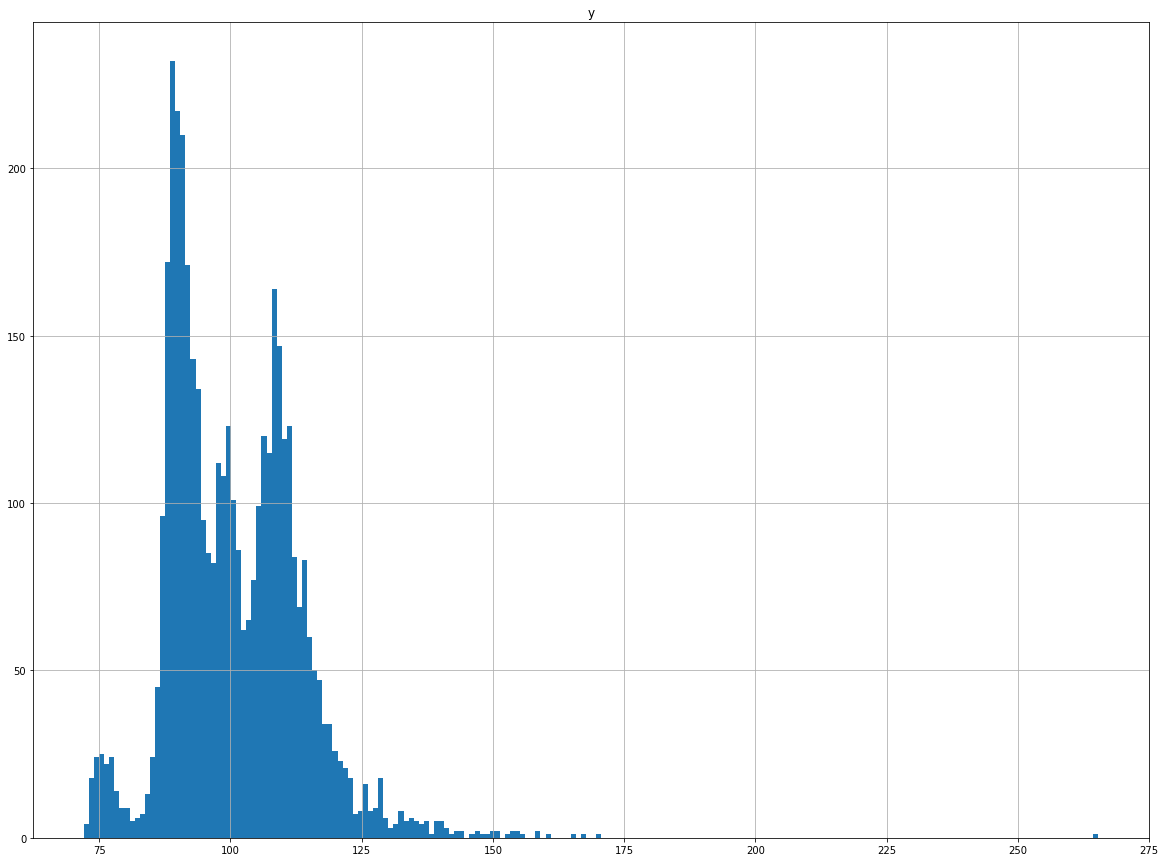

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4208
Columns: 357 entries, ID to X191
dtypes: int64(156), uint8(201)
memory usage: 5.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 0 to 4207
Columns: 352 entries, ID to X191
dtypes: float64(1), int64(156), uint8(195)
memory usage: 5.9 MB


In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from subprocess import check_output
from sklearn import metrics, model_selection
# /Users/mli3/ml/Kaggle/train.csv

def load_data(csv_path):
    return pd.read_csv(csv_path)

# load the data

train = load_data("data/train.csv")
test = load_data("data/test.csv")


train.describe()

# remove columns where the value is the same for all rows (no new information)
nunique = train.apply(pd.Series.nunique)
col_same_train = list(nunique[nunique==1].index)
train2 = train.drop(col_same_train,1)

# apply the same to the test set
test2 = test.drop(col_same_train, 1)
# remove columns where the column is same as another column

# hist of Y

import matplotlib.pyplot as plt
y_train = train2[["y"]]
y_train.hist(bins=200, figsize=(20,15))
plt.show()

# remove row without the maximum y (looks like outliet)
train3 = train2.loc[train2['y']!=train2['y'].max()]

c = train3.corr()
s = c.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so['y']

# remove columns that are identical and also those that are complete opposite
col_same = s[((s==1) | (s==-1)) & (s.index.get_level_values(0) != s.index.get_level_values(1))]
#keep the smaller of the columns
# if x is smaller than the other columns, throw other columns out, else ignore
dup_columns = set()
for x,y in col_same.index:
    if int(x[1:]) < int(y[1:]):
        dup_columns.add(y)

# there are 45+8 dup_columns
train4 = train3.drop(list(dup_columns), 1)
test4 = test2.drop(list(dup_columns), 1)
# impute missing values

# # this part might be unecessary
# from sklearn.preprocessing import Imputer

# imputer = Imputer(strategy="median")

# df_dedup_num = df_dedup.drop(["ID", "y", "X0",  "X1",  "X2", "X3", "X4", "X5", "X6", "X8"], axis=1)
# imputer.fit(df_dedup_num)
# imputer.statistics_
# df_dedup_num.median().values
# X = imputer.transform(df_dedup_num)
# df_dedup_num_tr = pd.DataFrame(X, columns=df_dedup_num.columns)

# 1 hot encoding


train_num = train4.drop(["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"], 1) # kept y column
train_cat = train4.loc[:, ["ID", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]]



test_num = test4.drop(["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"], 1)
test_cat = test4.loc[:, ["ID", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]]
#from sklearn.preprocessing import LabelBinarizer
#encoder = LabelBinarizer()
#data_dedup_cat_1hot = encoder.fit_transform(data_dedup_cat)
#data_dedup_cat_1hot


train_one_hot_cat = pd.get_dummies(train_cat, columns=["X0", "X1",  "X2", "X3", "X4", "X5", "X6", "X8"])
train_one_hot = train_one_hot_cat.merge(train_num, on='ID')

test_one_hot_cat = pd.get_dummies(test_cat, columns=["X0", "X1",  "X2", "X3", "X4", "X5", "X6", "X8"])
test_one_hot = test_one_hot_cat.merge(test_num, on='ID')

X = train_one_hot.drop(['ID', 'y'], axis=1)
y = train_one_hot['y']


feature_labels = X.columns
forest = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X, y)    # Fits the Random Forest Regressor to the entire data set.
importances = forest.feature_importances_  # Sets importances equal to the feature importances of the model
indices = np.argsort(importances)[::-1]
order_features = []
order_importances = []
for f in range(X.shape[1]):
    #print("%2d) %-*s %f" % (f+1, 30, feature_labels[indices[f]], importances[indices[f]]))
    order_features.append(feature_labels[f])
    order_importances.append(importances[indices[f]])





# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score



test = test_one_hot.drop(order_features[350:], axis=1)
train = train_one_hot.drop(order_features[350:], axis=1) # Modify train to only take in the top 100 features and the target column y
test.info()
train.info()

In [36]:
test = test_one_hot.loc[:,list(train.columns)]
test = test.drop(['y'], axis=1)
test = test.fillna(0)
test.head()

,ID,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,...,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191
0,1,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [37]:
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
import xgboost as xgb
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score



In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score



class StackingEstimator(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))

        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))

        return X_transformed

In [39]:
n_comp = 12
test.info()
train.info()
# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(train.drop(["y"], axis=1))
tsvd_results_test = tsvd.transform(test)

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(train.drop(["y"], axis=1))
grp_results_test = grp.transform(test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(train.drop(["y"], axis=1))
srp_results_test = srp.transform(test)

#save columns list before adding the decomposition components

usable_columns = list(set(train.columns) - set(['y']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4208
Columns: 351 entries, ID to X191
dtypes: float64(10), int64(156), uint8(185)
memory usage: 6.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 0 to 4207
Columns: 352 entries, ID to X191
dtypes: float64(1), int64(156), uint8(195)
memory usage: 5.9 MB


In [40]:
for i in range(1, n_comp + 1):
    train['pca_' + str(i)] = pca2_results_train[:, i - 1]
    test['pca_' + str(i)] = pca2_results_test[:, i - 1]

    train['ica_' + str(i)] = ica2_results_train[:, i - 1]
    test['ica_' + str(i)] = ica2_results_test[:, i - 1]

    train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

    train['grp_' + str(i)] = grp_results_train[:, i - 1]
    test['grp_' + str(i)] = grp_results_test[:, i - 1]

    train['srp_' + str(i)] = srp_results_train[:, i - 1]
    test['srp_' + str(i)] = srp_results_test[:, i - 1]

In [41]:
y_train = train['y'].values
y_mean = np.mean(y_train)
id_test = test['ID'].values
#finaltrainset and finaltestset are data to be used only the stacked model (does not contain PCA, SVD... arrays) 
finaltrainset = train[usable_columns].values
finaltestset = test[usable_columns].values

In [42]:
'''Train the xgb model then predict the test data'''

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}


dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test)

num_boost_rounds = 1250
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred = model.predict(dtest)

In [43]:
'''Train the stacked models then predict the test data'''

stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=5, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7, n_estimators=200)),
    ElasticNetCV()

)

stacked_pipeline.fit(finaltrainset, y_train)
results = stacked_pipeline.predict(finaltestset)

'''R2 Score on the entire Train data when averaging'''

print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(finaltrainset)*0.2855 + model.predict(dtrain)*0.7145))



'''Average the predictions test data of both models then save it on a csv file'''

print('Cross Validation')
print('................')

n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)

X = train.drop('y', axis=1).values
y = train['y'].values


fold = 0
for train_index, test_index in kf.split(X, y):
    fold += 1
    
    X_training, X_valid = X[train_index], X[test_index]
    y_training, y_valid = y[train_index], y[test_index]
    
    finaltrainset = train[usable_columns].values
    final_train, final_valid = finaltrainset[train_index], finaltrainset[test_index]
    
    print("Fold", fold, X_training.shape, X_valid.shape)
    
    print('Fitting XGBoost for Fold {}'.format(fold))
    dtrain = xgb.DMatrix(X_training, y_training)
    dtest = xgb.DMatrix(X_valid)
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
    
    print('Fitting stacked pipeline for Fold {}'.format(fold))
    stacked_pipeline.fit(final_train, y_training)
    
    print(r2_score(y_valid,stacked_pipeline.predict(final_valid)*0.2855 + model.predict(dtest)*0.7145))

    
sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = y_pred*0.75 + results*0.25
sub.to_csv('stacked-models.csv', index=False)

R2 score on train data:
0.673669917928
Cross Validation
................


/Users/amcfarlin/Projects/gunnars_data_championships/venv/lib/python3.4/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Fold 1 (3346, 411) (862, 411)
Fitting XGBoost for Fold 1
Fitting stacked pipeline for Fold 1
0.567902893042
Fold 2 (3360, 411) (848, 411)
Fitting XGBoost for Fold 2
Fitting stacked pipeline for Fold 2
0.585742504179
Fold 3 (3383, 411) (825, 411)
Fitting XGBoost for Fold 3
Fitting stacked pipeline for Fold 3
0.563137995655
Fold 4 (3390, 411) (818, 411)
Fitting XGBoost for Fold 4
Fitting stacked pipeline for Fold 4
0.601438061777
Fold 5 (3353, 411) (855, 411)
Fitting XGBoost for Fold 5
Fitting stacked pipeline for Fold 5
0.612825396702
